In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load the data from the Excel file
from google.colab import files
uploaded = files.upload()
data = pd.read_excel('data.xlsx')

Saving data.xlsx to data.xlsx


Alpha using normal equation: [ 7.05904176e-01 -1.68042233e+00  2.34962959e+03]
Alpha using pseudoinverse: [ 7.05904176e-01 -1.68042233e+00  2.34962959e+03]
Quadratic Equation: y = 0.706 * x^2 + -1.680 * x + 2349.630


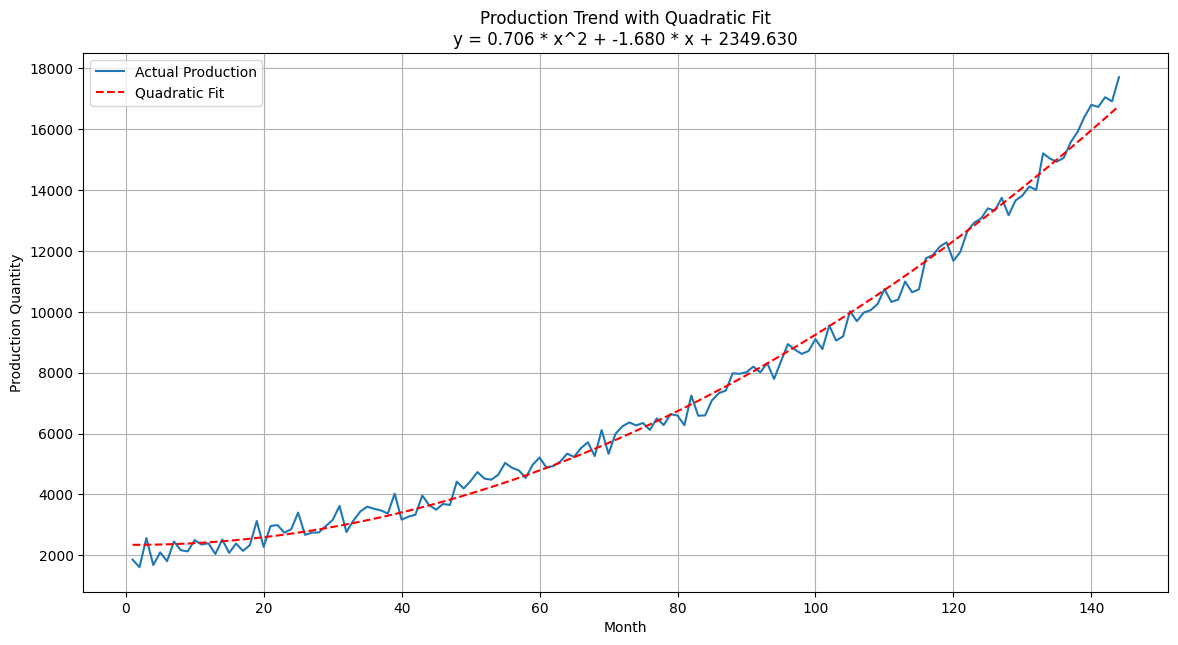

In [ ]:
# Extract the x (month numbers) and y (production quantities) values
x = np.array(np.arange(1, 145))  # M1 to M144
y = np.array(data.iloc[0].values) # Production quantities

# Design matrix for quadratic model
A = np.vstack([x**2, x, np.ones(len(x))]).T  # Create a matrix with columns
Y = y[:, np.newaxis]  # Convert y to a column vector

# Least squares solution using normal equation
# alpha = (A.T * A)^-1 * A.T * Y
alpha = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), Y)
print("Alpha using normal equation:", alpha.flatten())

# Least squares solution using pseudoinverse
# alpha2 = A^+ * Y, where A^+ is the pseudoinverse of A
pinv = np.linalg.pinv(A)
alpha2 = pinv.dot(Y)
print("Alpha using pseudoinverse:", alpha2.flatten())

# Define the quadratic equation as a string
equation = f"y = {alpha[0,0]:.3f} * x^2 + {alpha[1,0]:.3f} * x + {alpha[2,0]:.3f}"

# Print the equation
print("Quadratic Equation:", equation)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x, y, label='Actual Production')
plt.plot(x, alpha[0]*x**2 + alpha[1]*x + alpha[2], '--r', label='Quadratic Fit')
plt.xlabel("Month")
plt.ylabel("Production Quantity")
plt.title(f'Production Trend with Quadratic Fit\n{equation}')
plt.legend()
plt.grid(True)
plt.show()



For x = 1, y (Taylor Series approx) = 2348.303


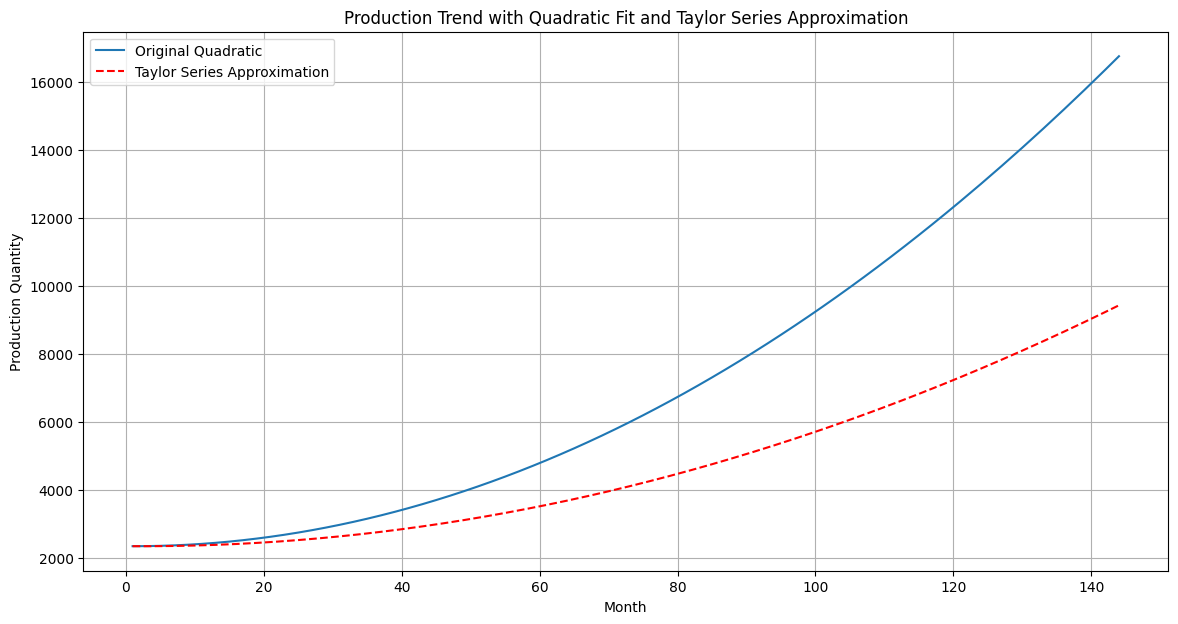

In [ ]:
# Coefficients of the original quadratic equation
alpha_0 = 0.706
alpha_1 = -1.680
alpha_2 = 2349.630

# Taylor Series Expansion around a = 0
a = 0
f_a = alpha_2  # f(0)
f_prime_a = alpha_1  # f'(0)
f_double_prime_a = alpha_0  # f''(0)

# Taylor Series approximation function
def taylor_series_approx(x, a, f_a, f_prime_a, f_double_prime_a):
    return f_a + f_prime_a * (x - a) + (f_double_prime_a / 2) * (x - a)**2

# Example value of x
x_value = 1

# Compute y for the given x_value using Taylor Series approximation
y_taylor = taylor_series_approx(x_value, a, f_a, f_prime_a, f_double_prime_a)

print(f"For x = {x_value}, y (Taylor Series approx) = {y_taylor:.3f}")

# Plot the entire function for a range of x values
x_range = np.arange(1, 145)
y_original = alpha_0 * x_range**2 + alpha_1 * x_range + alpha_2
y_taylor_range = taylor_series_approx(x_range, a, f_a, f_prime_a, f_double_prime_a)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(x_range, y_original, label='Original Quadratic')
plt.plot(x_range, y_taylor_range, '--r', label='Taylor Series Approximation')
plt.xlabel("Month")
plt.ylabel("Production Quantity")
plt.title('Production Trend with Quadratic Fit and Taylor Series Approximation')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Quadratic function and its derivative
def f(x):
    return alpha[0,0] * x**2 + alpha[1,0] * x + alpha[2,0] - 25000

def g(x):
    return 2 * alpha[0,0] * x + alpha[1,0]

# Newton-Raphson method
def newton_raphson_v2(x0, tolerance):
    x1 = x0 - f(x0) / g(x0)

    if np.abs(f(x1)) < tolerance:
        return x1
    return newton_raphson_v2(x1, tolerance)

# Initial guess and tolerance
initial_guess = 144  # Start looking after the last data point
tolerance = 0.015  # Tolerance for convergence

# Find the root
root = newton_raphson_v2(initial_guess, tolerance)

# Calculate the month when production will exceed 25,000 bags
production_exceed_month = root

# Calculate the month to start building the new warehouse (13 months before the production exceeds 25,000 bags)
start_building_month = root - 13

# Convert the result to a more readable form (year and month)
production_exceed_year = 2018 + int(production_exceed_month // 12)
production_exceed_month_in_year = int(production_exceed_month % 12)

start_building_year = 2018 + int(start_building_month // 12)
start_building_month_in_year = int(start_building_month % 12)

# Adjust the month and year if the month is 0
if production_exceed_month_in_year == 0:
    production_exceed_month_in_year = 12
    production_exceed_year -= 1

if start_building_month_in_year == 0:
    start_building_month_in_year = 12
    start_building_year -= 1

# Correct for the case when pro

# Correct for the case when start building month exceeds 12
if start_building_month_in_year > 12:
    start_building_month_in_year -= 12
    start_building_year += 1

# Print the results
print(f"Production will exceed 25,000 bags in: {production_exceed_year}-{production_exceed_month_in_year:02d}")
print(f"Start building the new warehouse in: {start_building_year}-{start_building_month_in_year:02d}")
print(f"Production exceed month :" ,int(production_exceed_month))
print(f"Start building month :", int(production_exceed_month)-13)


Production will exceed 25,000 bags in: 2032-12
Start building the new warehouse in: 2031-11
Production exceed month : 180
Start building month : 167
